# Exoplanets Classifiers

Aluno: Daniel Souza de Campos

Esse é um trabalho para a matéria de ML na UFMG cujo objetivo é utilizar e avaliar vários modelos de classificação em cima de um dataset de exoplanetas.

In [321]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
GLOBAL_RANDOM_STATE = 42

# Carregando o dataset

In [322]:
koiDf = pd.read_csv("koi_data.csv")

In [323]:
koiDf.head(5)

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


In [324]:
len(koiDf)

5202

In [325]:
len(koiDf.columns)

43

# Normalizando os dados

In [326]:
from sklearn.preprocessing import StandardScaler

In [327]:
scaler = StandardScaler()

In [328]:
koiDf[koiDf.columns.difference(['kepoi_name','koi_disposition'], sort=False)] = scaler.fit_transform(
                                                koiDf[koiDf.columns.difference(['kepoi_name','koi_disposition'], sort=False)]
                                                )

In [329]:
koiDf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
kepoi_name,5202,5202,K00752.01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
koi_disposition,5202,2,FALSE POSITIVE,3098,NaN,NaN,NaN,NaN,NaN,NaN,NaN
koi_period,5202.0,NaN,NaN,NaN,0.0,1.000096,-0.4154,-0.39383,-0.33532,-0.15365,11.697844
koi_impact,5202.0,NaN,NaN,NaN,-0.0,1.000096,-0.272876,-0.186878,-0.040756,0.078633,38.086232
koi_duration,5202.0,NaN,NaN,NaN,-0.0,1.000096,-0.790355,-0.44625,-0.258767,0.056554,19.094174
koi_depth,5202.0,NaN,NaN,NaN,-0.0,1.000096,-0.318579,-0.315952,-0.311187,-0.286934,12.584014
koi_ror,5202.0,NaN,NaN,NaN,0.0,1.000096,-0.090456,-0.085905,-0.081602,-0.024728,38.52932
koi_srho,5202.0,NaN,NaN,NaN,0.0,1.000096,-0.135912,-0.128906,-0.106145,-0.045697,36.425594
koi_prad,5202.0,NaN,NaN,NaN,0.0,1.000096,-0.030316,-0.029943,-0.029634,-0.024486,54.125373
koi_sma,5202.0,NaN,NaN,NaN,0.0,1.000096,-0.624341,-0.517627,-0.349492,0.000222,7.76093


Agora, podemos ver que as colunas quantitativas possuem a média igual a 0 e desvio padrão igual a 1.

# Separando em dados de treino e de teste

In [330]:
from sklearn.model_selection import train_test_split

In [331]:
Y = koiDf['koi_disposition']
X = koiDf[koiDf.columns.difference(['kepoi_name','koi_disposition'], sort=False)]

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=GLOBAL_RANDOM_STATE)

# Gaussian Naive Bayes

In [333]:
from sklearn.naive_bayes import GaussianNB
model_name = 'naive_bayes'
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

### Avaliação

In [334]:
models_scores = dict()

In [335]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
print(classification_report(y_test, y_pred, digits=3))
models_scores[model_name] = {'acc':accuracy_score(y_test, y_pred)}

                precision    recall  f1-score   support

     CONFIRMED      0.830     0.966     0.893       409
FALSE POSITIVE      0.975     0.872     0.921       632

      accuracy                          0.909      1041
     macro avg      0.903     0.919     0.907      1041
  weighted avg      0.918     0.909     0.910      1041



In [336]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [337]:
def plotConfusionMatrix(y_test, y_pred, model=None, model_score_dict=None):
    """
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
    """
    cm = confusion_matrix(y_test, y_pred)
    if model != None:
        model_score_dict[model]['confirmed_acc'] = cm[0][0]
        model_score_dict[model]['false_positive_acc'] = cm[1][1]
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')
    plt.show()

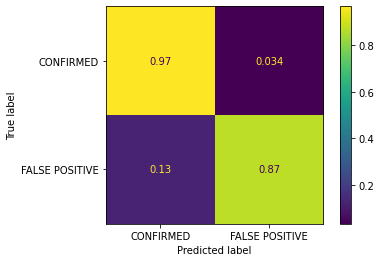

In [338]:
plotConfusionMatrix(y_test, y_pred, model_name, models_scores)

Podemos observar que o modelo obteve altíssima precisão ao detectar FALSE POSITIVEs, mas sua revocação foi menor quando comparada à revocação de CONFIRMED. No geral, sua acurácia foi de 0.909. Um número muito bom.

In [339]:
def toOnesAndZeros(array, positive_label = 'CONFIRMED'):
    myArray = np.array([1 if x == positive_label else 0 for x in array])
    return myArray

In [340]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(toOnesAndZeros(y_test), toOnesAndZeros(y_pred))

In [341]:
def plotROC(fpr, tpr):
    """
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    """
    plt.figure(figsize=(8,6))
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % auc(fpr,tpr),
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

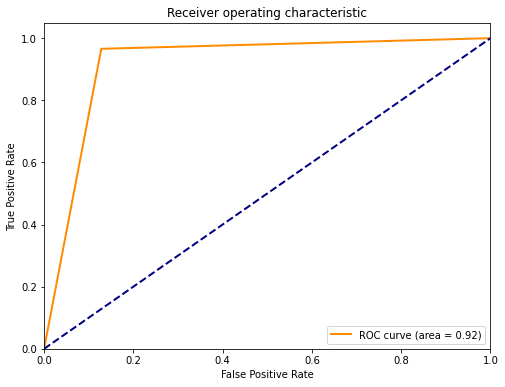

In [342]:
plotROC(fpr, tpr)

# Decision Tree

In [343]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model_name = 'decision_tree'
grid_params = {
    'criterion':['entropy'],
    'random_state': [GLOBAL_RANDOM_STATE],
    'max_depth': [5, 10, 20, 30, int(10E+10)], # int(10E+10) == profundidade infinita
    'min_samples_split': [2, 8]
}

Vamos realizar um GridSearch com validação cruzada (CV) para tunnar os hiperparâmetros do modelo.

As principais questões de uma árvore de classificação são: A profundidade e a quantidade de dados por nó mínima para continuar a expansão da árvore. Dessa forma, serão testadas combinações desses dois hiperparâmetros.

Além disso, o critério de escolha de melhor característica a ser usada na divisão será a entropia e não o gini.

In [344]:
%%time
tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, grid_params, scoring = 'accuracy', n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

CPU times: total: 422 ms
Wall time: 5.53 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [5, 10, 20, 30, 100000000000],
                         'min_samples_split': [2, 8], 'random_state': [42]},
             scoring='accuracy')

O Grid Search foi configurado para medir a [acurácia](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules) do modelo com 5 splits.

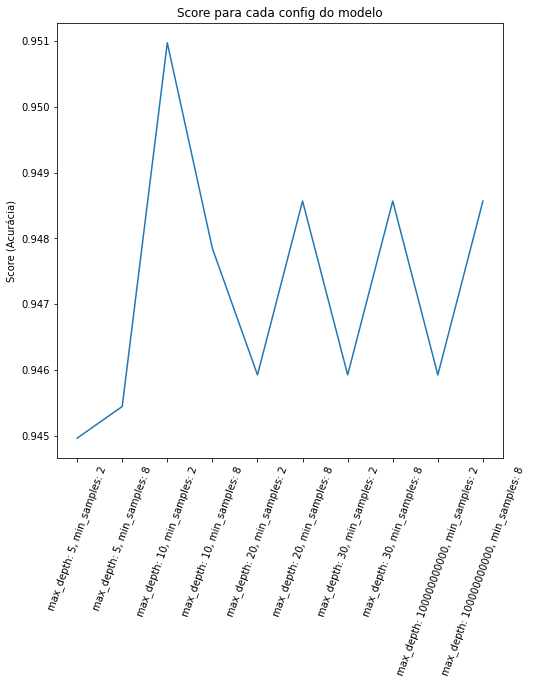

In [345]:
x_labels = []
for config in clf.cv_results_['params']:
    label = 'max_depth: '+str(config['max_depth'])+", min_samples: "+str(config['min_samples_split'])
    x_labels.append(label)

plt.figure(figsize=(8,8))
plt.title("Score para cada config do modelo")
plt.plot(x_labels, clf.cv_results_['mean_test_score'])
plt.xticks(rotation = 70)
plt.ylabel("Score (Acurácia)")
plt.show()

Podemos ver que o melhor modelo encontrado foi o com a seguinte configuração: 


In [346]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 2,
 'random_state': 42}

E obteve o seguinte score na validação:

In [347]:
clf.best_score_

0.9509733701172776

# Testando o melhor modelo

In [348]:
bestTree = clf.best_estimator_
y_pred = bestTree.predict(X_test)

In [349]:
print(classification_report(y_test, y_pred, digits=3))
models_scores[model_name] = {'acc': accuracy_score(y_test, y_pred)}

                precision    recall  f1-score   support

     CONFIRMED      0.935     0.949     0.942       409
FALSE POSITIVE      0.966     0.957     0.962       632

      accuracy                          0.954      1041
     macro avg      0.951     0.953     0.952      1041
  weighted avg      0.954     0.954     0.954      1041



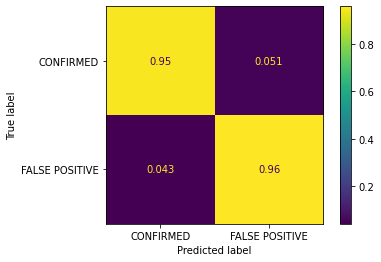

In [350]:
plotConfusionMatrix(y_test, y_pred, model_name, models_scores)

Dessa vez, podemos perceber que o valor de precisão de FALSE POSITIVEs diminuiu um pouco mas a precisão para CONFIRMED aumentou consideravelmente quando comparado com o Gaussian Naive Bayes. A acurácia também aumentou.

In [351]:
fpr, tpr, thresholds = roc_curve(toOnesAndZeros(y_test), toOnesAndZeros(y_pred))

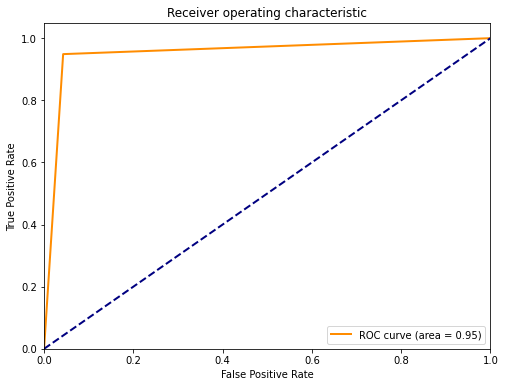

In [352]:
plotROC(fpr, tpr)

Até agora, temos os seguintes dados:

In [355]:
scoresDf = pd.DataFrame.from_dict(models_scores)
scoresDf

,naive_bayes,decision_tree
acc,0.908742,0.95389
confirmed_acc,395.000000,388.00000
false_positive_acc,551.000000,605.00000
